# Hypothesis test + Clustering

### 2 sample t-test

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
NBA_4th = pd.read_csv("data/NBA_4th_comp.csv")
first_3 = pd.read_csv("data/first_3_comp.csv")

In [3]:
first_3.columns

Index(['index', 'TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'COURT', 'Opponent',
       'OppPTS', 'OppFGM', 'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%',
       'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB', 'OppREB', 'OppAST',
       'OppTOV', 'OppSTL', 'OppBLK', 'OppPF', 'Pos', 'OppPos', 'Pace',
       'OFFRTG', 'DEFRTG', 'Margin', 'formatted_date', 'week_of_season',
       'PTS/Q'],
      dtype='object')

H0: first 3 quarter = 4th quarter

In [4]:
columns = ['Pace','OFFRTG','DEFRTG',"3P%","AST",'FT%']
for col in columns:
    t_stat, p_val = stats.ttest_ind(NBA_4th[col], first_3[col])
    print("p value for %s: " % (col) + str(p_val) +" and the statistic: " + str(t_stat))

p value for Pace: 5.410633976633586e-96 and the statistic: -21.347123622937794
p value for OFFRTG: 0.004838086722404326 and the statistic: 2.8191479560552635
p value for DEFRTG: 0.004838086722404326 and the statistic: 2.8191479560552635
p value for 3P%: 0.0 and the statistic: 88.59857439755925
p value for AST: 0.0 and the statistic: -141.50599947239903
p value for FT%: nan and the statistic: nan


- Reject H0 at the 95% confidence interval for Pace, AST, 3P%, 'PTS', 'FT%
- Can´t reject H0 for DEFRTG and OFFRTG

### KMeans Clustering

In [5]:
teams_3rd = first_3.pivot_table(index = "TEAM", values = ["DEFRTG","OFFRTG"], aggfunc = np.mean)
teams_4th = NBA_4th.pivot_table(index = "TEAM", values = ["DEFRTG","OFFRTG"], aggfunc = np.mean)
teams_3rd[["DEFRTG_4th","OFFRTG_4th"]] = teams_4th[["DEFRTG","OFFRTG"]]
teams_3rd

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
ATL,119.079685,118.099391,119.521360,117.226451
BKN,115.072300,113.507262,116.530290,116.822819
BOS,113.140146,121.705534,114.179364,118.974564
CHA,118.156950,109.893448,120.792651,118.644274
CHI,115.683230,114.266850,120.344191,118.987953
CLE,112.581918,114.127385,114.656883,116.373629
DAL,116.163985,116.327075,117.847457,118.221220
DEN,114.194702,118.386920,112.865414,117.902310
DET,117.069504,111.380757,118.299949,111.720484


In [6]:
samples = teams_3rd.to_numpy()

In [7]:
classifier = KMeans(n_clusters = 4, random_state = 1)
classifier.fit(samples)


KMeans(n_clusters=4, random_state=1)

Four clusters are a good fit

C:\Users\fre_d\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


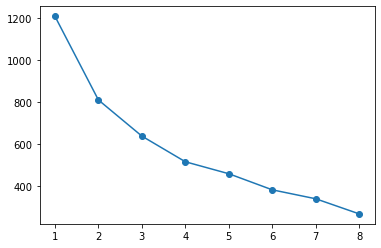

In [8]:
num_clusters = list(range(1,9))
inertias =  []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

In [9]:
classifier.labels_

array([2, 2, 1, 2, 2, 3, 2, 1, 0, 1, 3, 1, 1, 2, 3, 0, 1, 3, 2, 1, 1, 3,
       2, 0, 0, 2, 2, 2, 2, 0])

In [10]:
cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []
cluster_three_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif classifier.labels_[i] == 2:
        cluster_two_indices.append(i)
    elif classifier.labels_[i] == 3:
        cluster_three_indices.append(i)        
print(cluster_zero_indices)

[8, 15, 23, 24, 29]


The worst group: bad defense and/or bad offense

In [11]:
cluster_zero_df = teams_3rd.iloc[cluster_zero_indices]
cluster_zero_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
DET,117.069504,111.380757,118.299949,111.720484
MIA,112.010530,114.704496,116.677311,108.041507
PHX,116.040821,118.706387,116.933183,110.940465
POR,117.328867,112.263105,113.013262,107.060348
WAS,118.408099,111.236152,115.868746,112.082895


Good teams in the first 3 quarters, but declined in the 4th quarter

In [12]:
cluster_one_df = teams_3rd.iloc[cluster_one_indices]
cluster_one_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
BOS,113.140146,121.705534,114.179364,118.974564
DEN,114.194702,118.386920,112.865414,117.902310
GSW,113.617552,118.304657,120.264725,119.972529
IND,118.049208,121.088713,117.189517,119.216601
LAC,115.049436,117.154752,119.789668,121.657790
MIL,115.329473,116.509026,119.540128,122.807312
NYK,116.116599,116.457204,113.008787,119.673729
OKC,113.755800,116.749392,116.492272,123.751331


Teams with bad offense in the 4th

In [13]:
cluster_two_df = teams_3rd.iloc[cluster_two_indices]
cluster_two_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
ATL,119.079685,118.099391,119.521360,117.226451
BKN,115.072300,113.507262,116.530290,116.822819
CHA,118.156950,109.893448,120.792651,118.644274
CHI,115.683230,114.266850,120.344191,118.987953
DAL,116.163985,116.327075,117.847457,118.221220
LAL,115.960378,115.640786,115.785003,116.157253
NOP,111.863725,115.581748,118.992810,115.999307
PHI,114.393253,116.499087,116.720634,116.849175
SAC,113.370081,117.058923,120.436177,115.967401


Elite group: good in the first 3 and in the 4th improved their defense and/or offense

In [14]:
cluster_three_df = teams_3rd.iloc[cluster_three_indices]
cluster_three_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
CLE,112.581918,114.127385,114.656883,116.373629
HOU,113.729871,112.087248,114.998123,117.021937
MEM,112.786556,107.125276,110.079651,112.737351
MIN,109.133051,114.588318,111.358294,116.681798
ORL,112.217713,113.484202,111.370580,115.246309
